In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import backend as K

C:\Users\Harsh\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [3]:
data_x=pd.read_pickle('trainX.pickle')
data_y=pd.read_pickle('trainY.pickle')

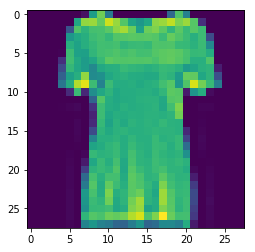

In [4]:
plt.imshow(data_x[10])

In [5]:
data_y[10]

0

In [6]:
img_rows, img_cols=28,28
K.image_data_format()

'channels_last'

In [7]:
x_train=data_x[:40000]
y_train=data_y[:40000]
x_test=data_x[40000:]
y_test=data_y[40000:]

In [8]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
print(input_shape)

(28, 28, 1)


In [9]:
batch_size=128
num_classes=10
epochs=100

In [10]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print('X train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

#converting class vectors to binary class matrices
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

X train shape: (40000, 28, 28, 1)
40000 train samples
20000 test samples


In [11]:
x_train=np.reshape(x_train,(40000,784))
x_test=np.reshape(x_test,(20000,784))

In [12]:
model=Sequential()
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=1,validation_data=(x_test,y_test))

score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 4s 106us/step - loss: 0.3444 - acc: 0.8712 - val_loss: 0.6466 - val_acc: 0.7442
Epoch 2/10
40000/40000 [==============================] - 5s 119us/step - loss: 0.3204 - acc: 0.8808 - val_loss: 0.3606 - val_acc: 0.8723
Epoch 3/10
40000/40000 [==============================] - 5s 118us/step - loss: 0.2964 - acc: 0.8883 - val_loss: 0.3265 - val_acc: 0.8824
Epoch 4/10
40000/40000 [==============================] - 5s 122us/step - loss: 0.2823 - acc: 0.8947 - val_loss: 0.3787 - val_acc: 0.8632
Epoch 5/10
40000/40000 [==============================] - 7s 171us/step - loss: 0.2668 - acc: 0.9002 - val_loss: 0.3904 - val_acc: 0.8533
Epoch 6/10
40000/40000 [==============================] - 6s 144us/step - loss: 0.2527 - acc: 0.9043 - val_loss: 0.4360 - val_acc: 0.8502
Epoch 7/10
40000/40000 [==============================] - 6s 142us/step - loss: 0.2409 - acc: 0.9087 - val_loss: 0.3207 - 

In [18]:
test=pd.read_pickle('testX.pickle')
test=test.reshape(test.shape[0],img_rows*img_cols)
model.predict(test)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)